# Exploração dos Dados: Roteiro

## Bibliotecas

**Instalação**

In [ ]:
# Comandos para a instalação das bibliotecas de exploração dos dados
%pip install pandas
%pip install plotly_express
%pip install missingno

**Importação**

In [2]:
import pandas as pd
import plotly.express as px
import missingno as msno
from scipy.stats import chi2_contingency
from scipy import stats
import numpy as np

## Carregamento dos Dados

In [3]:
## Carregamento
df = px.data.tips()

## Exploração dos Dados

### Análise Descritiva


**DESCRIÇÃO DOS DADOS**: Descreva textualmente o dataset e cada atributo (i.e., coluna) do conjunto de dados. No caso deste roteiro, vamos utilizar o conjunto de dados de gorjetas, que é um dataset do plotly.express, que consiste em registros das gorjetas dadas por diferentes clientes em um restaurante.

In [ ]:
# Obtém todas as colunas de um DataFrame
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

| Coluna | Descrição |
|--------|-----------|
| `total_bill`| O valor total da conta |
| `tip`| O valor da gorjeta |
| `sex`| O gênero da pessoa que deu a gorjeta |
| `smoker`| Indica se a pessoa é fumante |
| `day`| O dia da semana em que a refeição foi servida |
| `time`| O período da refeição: almoço ou jantar |
| `size`| A quantidade de pessoas na conta |

In [5]:
# Investigue os primeiros valores do dataset
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# Investigue os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


## Identificação de valores ausentes

<Axes: >

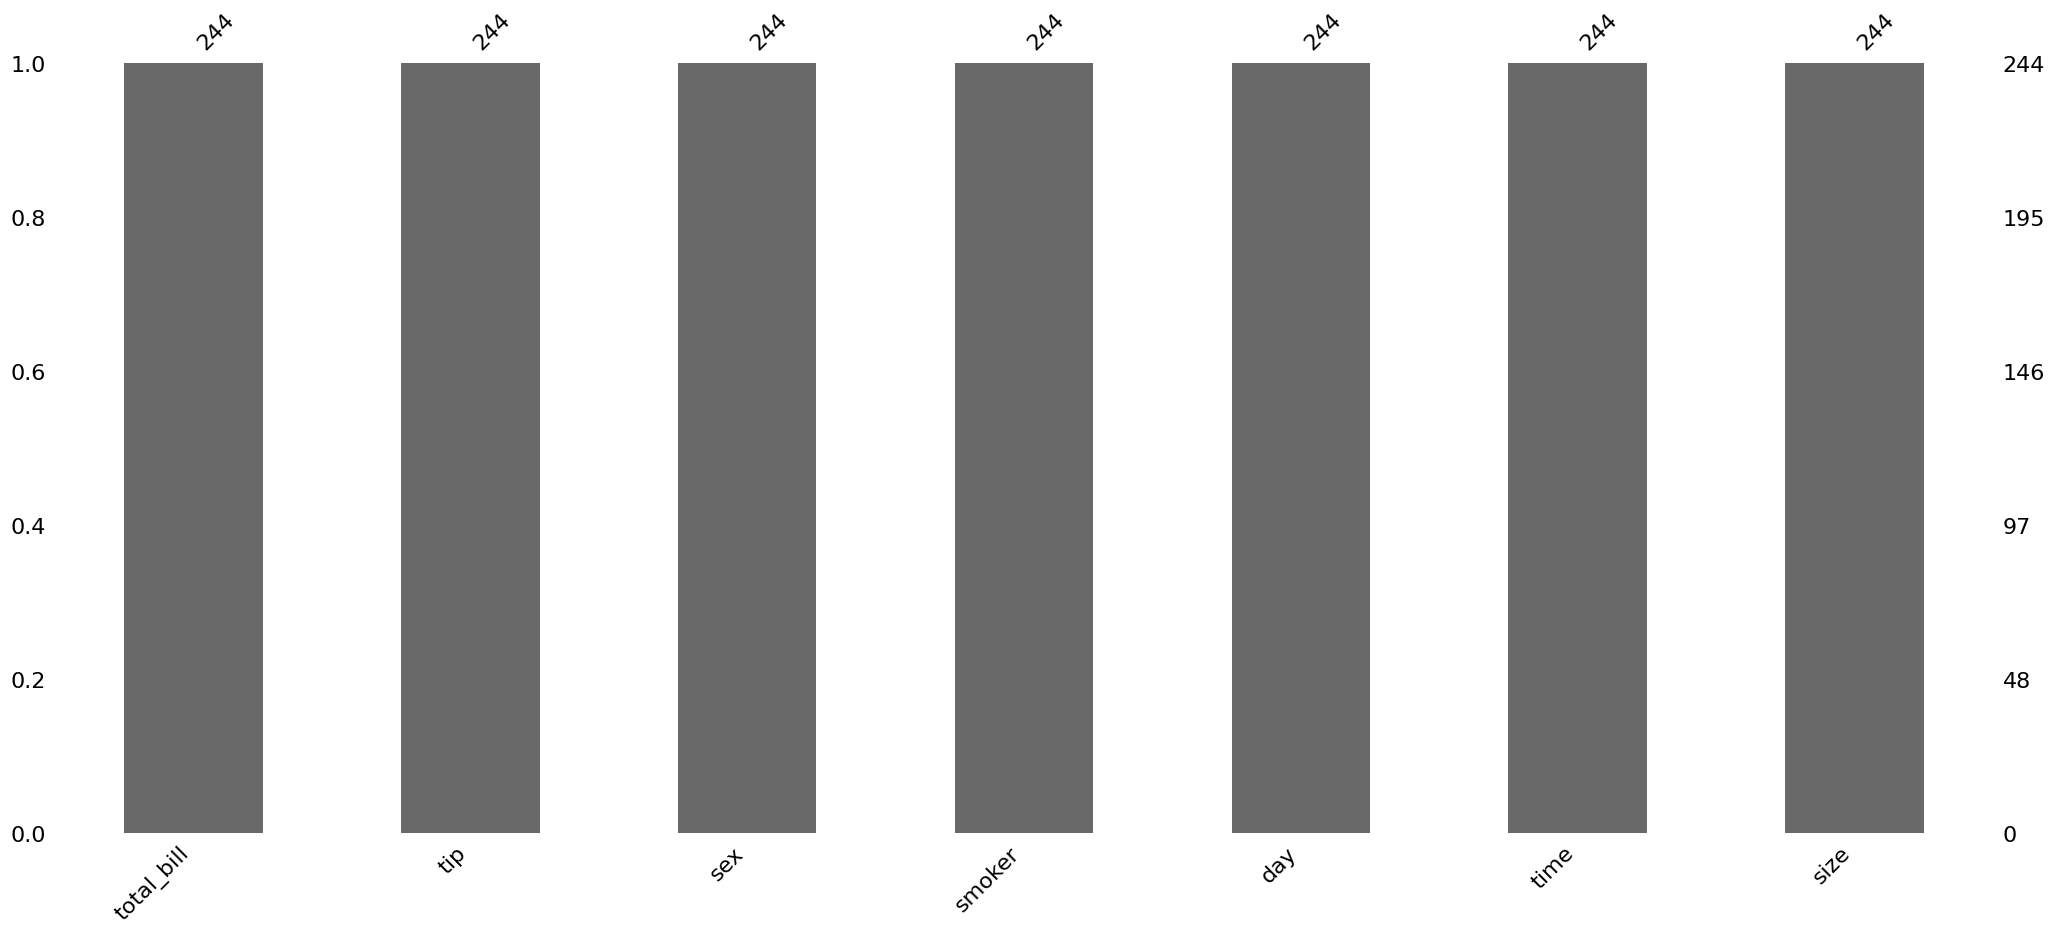

In [4]:
# Mostra em gráfico se há valores nulos na distribuição
msno.bar(df)

### Visualização dos Dados

In [5]:
# Altere a ordem das colunas para obter outros recortes da informação
df_nom = df.filter(["sex", "smoker", "time"])
df_nom.value_counts()

sex     smoker  time  
Male    No      Dinner    77
        Yes     Dinner    47
Female  No      Dinner    29
                Lunch     25
        Yes     Dinner    23
Male    No      Lunch     20
        Yes     Lunch     13
Female  Yes     Lunch     10
dtype: int64

In [10]:
# Altere a ordem das colunas para obter outros recortes da informação
fig = px.histogram(df_nom, x="sex", color="smoker", facet_col="time")
fig.update_layout(height=200, width=600)
fig.show()

#### Balanceamento das Classes

In [13]:
# Antes de modelar (i.e., criar os modelos preditivos) precisamos tratar as diferenças
fig = px.histogram(df, x=["sex", "day", "smoker", "time"], title="Balanceamento das classes")
fig.update_layout(height=300, width=600)
fig.show()

In [31]:
df_mean = df.groupby("day")["total_bill"].mean().reset_index()

fig = px.line(df_mean, x="day", y="total_bill", title="Média do valor total da conta por dia da semana",
              category_orders={"day": ["Thur", "Fri", "Sat", "Sun"]})  # Mantém a ordem dos dias
fig.show()

### Análise de Estatística Descritiva

In [10]:
# O describe fornece um sumário estatístico do dataset
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [15]:
fig = px.box(df, x="day", y="total_bill", title="Distribuição do valor total da conta por dia da semana",
             category_orders={"day": ["Thur", "Fri", "Sat", "Sun"]})  # Mantém a ordem dos dias
fig.update_layout(height=400, width=600)
fig.show()

In [17]:
df_heatmap = df.groupby(["day", "time"])["tip"].mean().reset_index()
df_heatmap = pd.pivot_table(df_heatmap, values='tip', index=['day'], columns=['time'])

fig = px.imshow(df_heatmap, title="Média do valor total da conta por dia da semana e horário",
                labels=dict(x="Horário", y="Dia da semana", color="Média da conta"),
                x=['Lunch', 'Dinner'], y=["Thur", "Fri", "Sat", "Sun"])
fig.update_layout(height=400, width=600)
fig.show()

### Exploração das Correlações

#### Níveis de Mensuração

Classifique as variáveis em termos de seus níveis de mensuração

#### Variáveis nominais

`sex`, `smoker`, `time`

#### Variáveis Ordinais

`day`, `time`

#### Variáveis Intervalares

`total_bill`, `tip`, `size`

#### Análise das Correlações

#### Variáveis nominais

In [39]:
contingency_table = pd.crosstab(df['sex'], df['smoker'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Valor de Qui-quadrado: ", chi2)
print("Valor-p: ", p)

Valor de Qui-quadrado:  0.0
Valor-p:  1.0


In [41]:
contingency_table = pd.crosstab(df['smoker'], df['time'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Valor de Qui-quadrado: ", chi2)
print("Valor-p: ", p)

Valor de Qui-quadrado:  0.5053733928754354
Valor-p:  0.4771485672079724


In [42]:
contingency_table = pd.crosstab(df['sex'], df['time'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Valor de Qui-quadrado: ", chi2)
print("Valor-p: ", p)

Valor de Qui-quadrado:  9.343808982970623
Valor-p:  0.002237400118075248


#### Variáveis ordinais

**Spearman**

In [52]:
from scipy.stats import spearmanr

rho, pval = spearmanr(df['day'], df['time'])

print("Correlação de Spearman: ", rho)
print("Valor-p: ", pval)

Correlação de Spearman:  0.6488964150114981
Valor-p:  1.4895652704122687e-30


**Kendall**

In [53]:
from scipy.stats import kendalltau

tau, pval = kendalltau(df['day'], df['time'])

print("Correlação de Kendall: ", tau)
print("Valor-p: ", pval)

Correlação de Kendall:  0.6010465685728887
Valor-p:  4.725958019170783e-24


#### Variáveis intervalares

In [4]:
from scipy.stats import pearsonr

r, pval = pearsonr(df['total_bill'], df['tip'])

print("Correlação de Pearson: ", r)
print("Valor-p: ", pval)

# No pandas:
# df.corr(method="pearson)


ModuleNotFoundError: No module named 'scipy'

## Detecção de Anomalias

Analisando os `outliers` para as colunas: `total_bill`, `tip`, `size`

### Z-Score

In [45]:
z_scores = np.abs(stats.zscore(df['total_bill']))
df_outliers = df[(z_scores > 2)]
df_outliers

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


In [46]:
z_scores = np.abs(stats.zscore(df['tip']))
df_outliers = df[(z_scores > 3)]
df_outliers

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


In [47]:
z_scores = np.abs(stats.zscore(df['size']))
df_outliers = df[(z_scores > 2.98)]
df_outliers

,total_bill,tip,sex,smoker,day,time,size
125,29.80,4.2,Female,No,Thur,Lunch,6
141,34.30,6.7,Male,No,Thur,Lunch,6
143,27.05,5.0,Female,No,Thur,Lunch,6
156,48.17,5.0,Male,No,Sun,Dinner,6


### Método IQR (Intervalo Interquartil)

In [50]:
col_name = 'size'

Q1 = df[col_name].quantile(0.25)
Q3 = df[col_name].quantile(0.75)
IQR = Q3 - Q1

df_outliers = df[(df[col_name] < (Q1 - 1.5 * IQR)) | (df[col_name] > (Q3 + 1.5 * IQR))]
df_outliers

,total_bill,tip,sex,smoker,day,time,size
125,29.80,4.20,Female,No,Thur,Lunch,6
141,34.30,6.70,Male,No,Thur,Lunch,6
142,41.19,5.00,Male,No,Thur,Lunch,5
143,27.05,5.00,Female,No,Thur,Lunch,6
155,29.85,5.14,Female,No,Sun,Dinner,5
156,48.17,5.00,Male,No,Sun,Dinner,6
185,20.69,5.00,Male,No,Sun,Dinner,5
187,30.46,2.00,Male,Yes,Sun,Dinner,5
216,28.15,3.00,Male,Yes,Sat,Dinner,5


## Avaliação de Normalidade

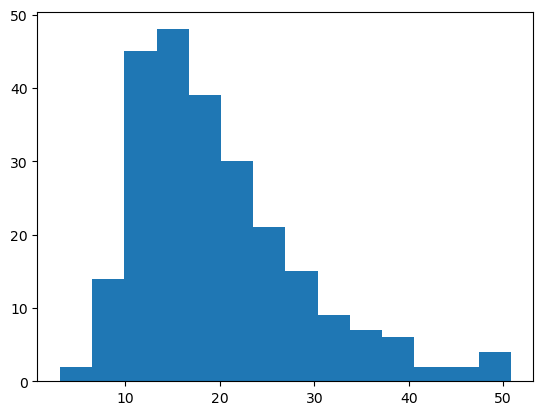

In [56]:
import matplotlib.pyplot as plt

# suponha que df é um DataFrame e 'column' é a coluna na qual você está interessado
plt.hist(df['total_bill'], bins='auto')
plt.show()

In [19]:
fig = px.histogram(df, x="total_bill", nbins=50)
fig.update_layout(height=300, width=600)
fig.show()

In [61]:
import scipy.stats as stats
import plotly.graph_objects as go

col_name = 'total_bill'
# suponha que df é um DataFrame e 'column' é a coluna na qual você está interessado
normal_dist = stats.norm(loc=df[col_name].mean(), scale=df[col_name].std())
sample_quantiles = df[col_name].quantile([0.25, 0.5, 0.75]).values
normal_quantiles = normal_dist.ppf([0.25, 0.5, 0.75])

fig = go.Figure()
fig.add_trace(go.Scatter(x=normal_quantiles, y=sample_quantiles, mode='markers'))
fig.update_layout(xaxis_title="Quantiles da distribuição normal",
                  yaxis_title="Quantiles da amostra",
                  title="Q-Q Plot")
fig.show()